# Extraction et Normalisation du Texte des Livres Harry Potter

Ce notebook extrait le texte des fichiers PDF des livres Harry Potter en français, puis normalise le texte pour une analyse ultérieure. Les étapes incluent l'importation des bibliothèques, la localisation des fichiers, l'extraction du texte, et la normalisation.

## 1. Importer les bibliothèques nécessaires
Nous allons utiliser les bibliothèques Python suivantes :
- `os` et `glob` pour la gestion des fichiers
- `pdfplumber` pour l'extraction du texte des PDF
- `re` pour la normalisation du texte
- `string` pour la gestion de la ponctuation

In [2]:
# Installer pdfplumber si nécessaire
!pip install pdfplumber

import os
import glob
import pdfplumber
import re
import string


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


## 2. Localiser les fichiers PDF
Nous allons lister tous les fichiers PDF présents dans le dossier `data/`.

In [3]:
# Lister tous les fichiers PDF dans le dossier data/source/
pdf_folder = 'data/source/'
pdf_files = glob.glob(os.path.join(pdf_folder, '*.pdf'))
print(f"Fichiers PDF trouvés : {pdf_files}")

Fichiers PDF trouvés : ['data/source/harry-potter-4-la-coupe-de-feu.pdf', 'data/source/harry-potter-6-le-prince-de-sang-mecc82lecc81.pdf', 'data/source/harry-potter-3-le-prisonnier-dazkaban.pdf', 'data/source/harry-potter-1-lecole-des-sorciers.pdf', 'data/source/harry-potter-2-la-chambre-des-secrets.pdf', 'data/source/harry-potter-5-lordre-du-phoenix.pdf', 'data/source/harry-potter-7-les-reliques-de-la-mort.pdf']


## 3. Extraire le texte des fichiers PDF
Nous allons extraire le texte de chaque fichier PDF et l'enregistrer dans un fichier `.txt` correspondant.

In [ ]:
# Extraire le texte de chaque PDF et enregistrer dans data/source/ (au lieu de preprocessing)
for pdf_path in pdf_files:
    book_name = os.path.splitext(os.path.basename(pdf_path))[0]
    txt_path = os.path.join('data/source/', f"{book_name}.txt")
    with pdfplumber.open(pdf_path) as pdf:
        full_text = ""
        for page in pdf.pages:
            full_text += page.extract_text() + "\n"
    with open(txt_path, "w", encoding="utf-8") as f:
        f.write(full_text)
    print(f"Texte extrait et sauvegardé dans {txt_path}")

Texte extrait et sauvegardé dans data/harry-potter-5-lordre-du-phoenix.txt


In [44]:
# Normalisation des fichiers .txt extraits depuis data/source/ vers data/preprocessing/ (préserve les sauts de ligne, remplace '\n-' et '\n–' par '\n—')
preserve_punct = '—'
for txt_path in glob.glob(os.path.join('data/source/', '*.txt')):
    with open(txt_path, 'r', encoding='utf-8') as f:
        text = f.read()
    # Remplacer '\n-' et '\n–' par '\n—' pour uniformiser les séparateurs de dialogue
    text = text.replace('\n-', '\n—')
    text = text.replace('\n–', '\n—')
    # Passage en minuscules
    text = text.lower()
    # Supprimer la ponctuation sauf celle utile pour les dialogues, mais préserver les sauts de ligne
    punct_to_remove = ''.join([c for c in string.punctuation if c not in preserve_punct])
    # On retire la ponctuation ligne par ligne pour préserver les \n
    lines = text.split('\n')
    cleaned_lines = [line.translate(str.maketrans('', '', punct_to_remove)) for line in lines]
    text_dialogue = '\n'.join(cleaned_lines)
    text_dialogue = re.sub(r' +', ' ', text_dialogue)
    # Sauvegarder le texte "dialogue-friendly" dans preprocessing
    dialogue_path = os.path.join('data/preprocessing/', os.path.basename(txt_path).replace('.txt', '_dialogue.txt'))
    with open(dialogue_path, 'w', encoding='utf-8') as f:
        f.write(text_dialogue)
    print(f"Texte dialogue-friendly sauvegardé dans {dialogue_path}")

Texte dialogue-friendly sauvegardé dans data/preprocessing/harry-potter-1-lecole-des-sorciers_dialogue.txt
Texte dialogue-friendly sauvegardé dans data/preprocessing/harry-potter-6-le-prince-de-sang-mecc82lecc81_dialogue.txt
Texte dialogue-friendly sauvegardé dans data/preprocessing/harry-potter-6-le-prince-de-sang-mecc82lecc81_dialogue.txt
Texte dialogue-friendly sauvegardé dans data/preprocessing/harry-potter-7-les-reliques-de-la-mort_dialogue.txt
Texte dialogue-friendly sauvegardé dans data/preprocessing/harry-potter-7-les-reliques-de-la-mort_dialogue.txt
Texte dialogue-friendly sauvegardé dans data/preprocessing/harry-potter-3-le-prisonnier-dazkaban_dialogue.txt
Texte dialogue-friendly sauvegardé dans data/preprocessing/harry-potter-3-le-prisonnier-dazkaban_dialogue.txt
Texte dialogue-friendly sauvegardé dans data/preprocessing/harry-potter-2-la-chambre-des-secrets_dialogue.txt
Texte dialogue-friendly sauvegardé dans data/preprocessing/harry-potter-2-la-chambre-des-secrets_dialogue

## Analyse automatisée des livres Harry Potter

Nous allons réaliser chaque tâche d'analyse dans une cellule dédiée. Les tâches complexes utiliseront un LLM pour la classification contextuelle, tandis que les tâches simples seront réalisées par des méthodes classiques de traitement du texte.

In [17]:
# 1. Extraire les contextes autour de "cicatrice" pour analyse LLM
import json
context_window = 50  # nombre de caractères avant/après
for dialogue_path in glob.glob(os.path.join('data/preprocessing/', '*_dialogue.txt')):
    with open(dialogue_path, 'r', encoding='utf-8') as f:
        text = f.read()
    contexts = []
    idx = 0
    while True:
        idx = text.find('cicatrice', idx)
        if idx == -1:
            break
        start = max(0, idx - context_window)
        end = min(len(text), idx + len('cicatrice') + context_window)
        contexts.append(text[start:end])
        idx += len('cicatrice')
    # Sauvegarder les contextes pour LLM
    out_path = os.path.join('data/cicatrice/', os.path.basename(dialogue_path).replace('_dialogue.txt', '_cicatrice_contexts.json'))
    with open(out_path, 'w', encoding='utf-8') as f:
        json.dump(contexts, f, ensure_ascii=False, indent=2)
    print(f"Contexts saved to {out_path}")

Contexts saved to data/cicatrice/harry-potter-1-lecole-des-sorciers_cicatrice_contexts.json
Contexts saved to data/cicatrice/harry-potter-3-le-prisonnier-dazkaban_cicatrice_contexts.json
Contexts saved to data/cicatrice/harry-potter-4-la-coupe-de-feu_cicatrice_contexts.json
Contexts saved to data/cicatrice/harry-potter-6-le-prince-de-sang-mecc82lecc81_cicatrice_contexts.json
Contexts saved to data/cicatrice/harry-potter-2-la-chambre-des-secrets_cicatrice_contexts.json
Contexts saved to data/cicatrice/harry-potter-7-les-reliques-de-la-mort_cicatrice_contexts.json
Contexts saved to data/cicatrice/harry-potter-5-lordre-du-phoenix_cicatrice_contexts.json


In [18]:
# 2. Extraire les contextes autour de Dumbledore pour analyse LLM (changement d'histoire)
dumbledore_keywords = ['dumbledore', 'albus']
context_window = 200
for dialogue_path in glob.glob(os.path.join('data/preprocessing/', '*_dialogue.txt')):
    with open(dialogue_path, 'r', encoding='utf-8') as f:
        text = f.read()
    contexts = []
    for dkw in dumbledore_keywords:
        idx = 0
        while True:
            idx = text.find(dkw, idx)
            if idx == -1:
                break
            window = text[max(0, idx-context_window):min(len(text), idx+context_window)]
            contexts.append(window)
            idx += len(dkw)
    out_path = os.path.join('data/dumbledore/', os.path.basename(dialogue_path).replace('_dialogue.txt', '_dumbledore_contexts.json'))
    with open(out_path, 'w', encoding='utf-8') as f:
        json.dump(contexts, f, ensure_ascii=False, indent=2)
    print(f"Contexts saved to {out_path}")

Contexts saved to data/dumbledore/harry-potter-1-lecole-des-sorciers_dumbledore_contexts.json
Contexts saved to data/dumbledore/harry-potter-3-le-prisonnier-dazkaban_dumbledore_contexts.json
Contexts saved to data/dumbledore/harry-potter-4-la-coupe-de-feu_dumbledore_contexts.json
Contexts saved to data/dumbledore/harry-potter-6-le-prince-de-sang-mecc82lecc81_dumbledore_contexts.json
Contexts saved to data/dumbledore/harry-potter-2-la-chambre-des-secrets_dumbledore_contexts.json
Contexts saved to data/dumbledore/harry-potter-7-les-reliques-de-la-mort_dumbledore_contexts.json
Contexts saved to data/dumbledore/harry-potter-5-lordre-du-phoenix_dumbledore_contexts.json


In [22]:
# 3. Extraire les contextes autour de Rogue pour analyse LLM (actions sombres/mystérieuses)
rogue_keywords = ['rogue', 'severus']
dark_keywords = ['sombre', 'mystérieux', 'sinistre', 'menaçant', 'obscur', 'secret', 'furtif']
context_window = 100
for dialogue_path in glob.glob(os.path.join('data/preprocessing/', '*_dialogue.txt')):
    with open(dialogue_path, 'r', encoding='utf-8') as f:
        text = f.read()
    contexts = []
    for rkw in rogue_keywords:
        idx = 0
        while True:
            idx = text.find(rkw, idx)
            if idx == -1:
                break
            for dkw in dark_keywords:
                window = text[max(0, idx-context_window):min(len(text), idx+context_window)]
                if dkw in window:
                    contexts.append(window)
            idx += len(rkw)
    out_path = os.path.join('data/rogue/', os.path.basename(dialogue_path).replace('_dialogue.txt', '_rogue_contexts.json'))
    with open(out_path, 'w', encoding='utf-8') as f:
        json.dump(contexts, f, ensure_ascii=False, indent=2)
    print(f"Contexts saved to {out_path}")

Contexts saved to data/rogue/harry-potter-1-lecole-des-sorciers_rogue_contexts.json
Contexts saved to data/rogue/harry-potter-3-le-prisonnier-dazkaban_rogue_contexts.json
Contexts saved to data/rogue/harry-potter-4-la-coupe-de-feu_rogue_contexts.json
Contexts saved to data/rogue/harry-potter-6-le-prince-de-sang-mecc82lecc81_rogue_contexts.json
Contexts saved to data/rogue/harry-potter-2-la-chambre-des-secrets_rogue_contexts.json
Contexts saved to data/rogue/harry-potter-7-les-reliques-de-la-mort_rogue_contexts.json
Contexts saved to data/rogue/harry-potter-5-lordre-du-phoenix_rogue_contexts.json


In [45]:
# 4. Identifier les dialogues et qui parle (Harry, Hermione, Ron) en associant un verbe de parole à un personnage avec regex (optimisé pour la vitesse, séparateur '\n—')
import re
import json
speech_verbs = [
    'dit', 'répondit', 'demanda', 'exclama', 'ajouta', 'murmura', 'cria', 'interrogea', 'souffla', 'proposa', 'lança',
    'affirma', 'insista', 'objecta', 'suggéra', 'poursuivit', 'déclara', 'précisa', 'supposa', 'continua', 'répliqua',
    'soupira', 'ordonna', 'expliqua', 'plaisanta', 'grogna', 'gronda', 'écria', 'balbutia', 'articula', 'protesta',
    'approuva', 'confia', 'admit', 'siffla', 'bredouilla', 'gémit', 'hurla', 'indigna', 'étonna', 'inquiéta',
    'énerva', 'chuchota', 'moqua', 'railla', 'rétorqua', 'conclut', 'annonça', 'avertit', 'avoua', 'corrigea',
    'décréta', 'déduisit', 'déplora', 'désapprouva', 'encouragea', 'félicita', 'grommela', 'implora', 'ordonna',
    'plaida', 'prédit', 'préconisa', 'préférait', 'prétexta', 'prévenait', 'proclama', 'promit', 'protesta', 'questionna',
    'rappela', 'rassura', 'reconnut', 'réfuta', 'regretta', 'remarqua', 'remontra', 'remplaça', 'répéta', 'répondit',
    'réprimanda', 'résuma', 'suggéra', 'susurra', 'taquina', 'tonna', 'tranquillisa', 'tutoya', 'vociféra', 'voulut'
]
speaker_keywords = {'harry': ['harry'], 'hermione': ['hermione'], 'ron': ['ron']}
speech_marker = '\n—'
# Précompiler tous les patterns pour chaque (verb, speaker) combinaison
compiled_patterns = []
for verb in speech_verbs:
    for speaker, keywords in speaker_keywords.items():
        for kw in keywords:
            # Regex: match e.g. "dit ... harry", "harry ... dit", allowing up to 3 words (adjectives/adverbs) between
            pattern1 = re.compile(rf"{verb}(?:\s+\w{{1,15}}){{0,3}}\s+{kw}")
            pattern2 = re.compile(rf"{kw}(?:\s+\w{{1,15}}){{0,3}}\s+{verb}")
            compiled_patterns.append((speaker, pattern1))
            compiled_patterns.append((speaker, pattern2))
for dialogue_path in glob.glob(os.path.join('data/preprocessing/', '*_dialogue.txt')):
    book_name = os.path.splitext(os.path.basename(dialogue_path))[0].replace('_dialogue', '')
    with open(dialogue_path, 'r', encoding='utf-8') as f:
        lines = f.read().split(speech_marker)[1:]
        lines = [line.split('\n')[0] for line in lines]
    book_speaker_counts = {'harry': 0, 'hermione': 0, 'ron': 0}
    book_speech_contexts = {'hermione': [], 'harry': [], 'ron': []}
    for line in lines:
        found = False
        for speaker, pattern in compiled_patterns:
            if pattern.search(line):
                book_speaker_counts[speaker] += 1
                book_speech_contexts[speaker].append(line.strip())
                found = True
                break
        # On ne continue pas à chercher si déjà trouvé
        if found:
            continue
    # Save counts and contexts for each book
    with open(f'data/speech/{book_name}_speech_counts.json', 'w', encoding='utf-8') as f:
        json.dump(book_speaker_counts, f, ensure_ascii=False, indent=2)
    with open(f'data/speech/{book_name}_hermione_speech_contexts.json', 'w', encoding='utf-8') as f:
        json.dump(book_speech_contexts['hermione'], f, ensure_ascii=False, indent=2)
    print(f"Répliques par personnage pour {book_name} sauvegardées dans data/speech/")

Répliques par personnage pour harry-potter-1-lecole-des-sorciers sauvegardées dans data/speech/
Répliques par personnage pour harry-potter-3-le-prisonnier-dazkaban sauvegardées dans data/speech/
Répliques par personnage pour harry-potter-3-le-prisonnier-dazkaban sauvegardées dans data/speech/
Répliques par personnage pour harry-potter-4-la-coupe-de-feu sauvegardées dans data/speech/
Répliques par personnage pour harry-potter-4-la-coupe-de-feu sauvegardées dans data/speech/
Répliques par personnage pour harry-potter-6-le-prince-de-sang-mecc82lecc81 sauvegardées dans data/speech/
Répliques par personnage pour harry-potter-6-le-prince-de-sang-mecc82lecc81 sauvegardées dans data/speech/
Répliques par personnage pour harry-potter-2-la-chambre-des-secrets sauvegardées dans data/speech/
Répliques par personnage pour harry-potter-2-la-chambre-des-secrets sauvegardées dans data/speech/
Répliques par personnage pour harry-potter-7-les-reliques-de-la-mort sauvegardées dans data/speech/
Répliques 

In [46]:
# 5. Compter le nombre de fois où Hermione dit "Mais" pour chaque livre et sauvegarder dans un seul fichier résumé
import glob
import re
import json
mais_summary = {}
for hermione_file in glob.glob('data/speech/*_hermione_speech_contexts.json'):
    book_name = os.path.basename(hermione_file).replace('_hermione_speech_contexts.json', '')
    with open(hermione_file, 'r', encoding='utf-8') as f:
        hermione_lines = json.load(f)
    mais_count = 0
    for line in hermione_lines:
        mais_count += len(re.findall(r'(?:\smais\s|—mais\s)', line))
    mais_summary[book_name] = mais_count
with open('data/mais/hermione_mais_count_summary.json', 'w', encoding='utf-8') as f:
    json.dump(mais_summary, f, ensure_ascii=False, indent=2)
print(f"Résumé des occurrences de 'Mais' par Hermione sauvegardé dans data/mais/hermione_mais_count_summary.json")

Résumé des occurrences de 'Mais' par Hermione sauvegardé dans data/mais/hermione_mais_count_summary.json


In [28]:
# 6. Détecter et extraire les contextes d'actes moralement répréhensibles (crimes, infractions, violations du règlement de Poudlard, etc.) - un fichier JSON par livre, sans compter
import glob
import re
import json
import os
illegal_keywords = [
    # Crimes et actes graves
    'meurtre', 'vol', 'torture', 'cruauté', 'trahison', 'kidnapping', 'chantage', 'abus', 'violence', 'corruption', 'discrimination', 'harcèlement', 'empoisonnement', 'magie noire',
    # Sortilèges interdits
    'sortilège interdit', 'sortilège impardonnable', 'avada kedavra', 'imperium', 'crucio',
    # Infractions scolaires
    'interdit', 'règlement', 'punition', 'détention', 'tricher', 'désobéir', 'mentir', 'bagarre', 'duel', 'utiliser la magie hors de poudlard', 'forêt interdite', "cape d'invisibilité", 'contourner la sécurité', 'fugue', 'sortir sans autorisation', 'salle de bain des préfets', 'sortir la nuit', 'passer outre', 'cacher', 'a enfreint', "n'avait pas le droit", "n'est pas autorisé", 'a été puni', 'a reçu une retenue', 'a été exclu', 'a été réprimandé', 'a été surpris', 'a été attrapé', 'a été convoqué', 'sanction', 'a été pris en train de', 'a été surpris en train de'
    # Ajoutez d'autres expressions selon vos besoins
 ]
context_window = 100
pattern = re.compile('|'.join(re.escape(kw) for kw in illegal_keywords))
output_folder = 'data/illegal'
os.makedirs(output_folder, exist_ok=True)
for dialogue_path in glob.glob(os.path.join('data/preprocessing/', '*_dialogue.txt')):
    book_name = os.path.splitext(os.path.basename(dialogue_path))[0].replace('_dialogue', '')
    with open(dialogue_path, 'r', encoding='utf-8') as f:
        text = f.read()
    acts = []
    for match in pattern.finditer(text):
        idx = match.start()
        kw = match.group()
        start = max(0, idx - context_window)
        end = min(len(text), idx + len(kw) + context_window)
        acts.append(text[start:end])
    # Un fichier JSON par livre, sans compter
    out_path = os.path.join(output_folder, f'{book_name}_illegal_contexts.json')
    with open(out_path, 'w', encoding='utf-8') as f:
        json.dump(acts, f, ensure_ascii=False, indent=2)
    print(f"Contexts d'actes répréhensibles sauvegardés dans {out_path}")

Contexts d'actes répréhensibles sauvegardés dans data/illegal/harry-potter-1-lecole-des-sorciers_illegal_contexts.json
Contexts d'actes répréhensibles sauvegardés dans data/illegal/harry-potter-3-le-prisonnier-dazkaban_illegal_contexts.json
Contexts d'actes répréhensibles sauvegardés dans data/illegal/harry-potter-4-la-coupe-de-feu_illegal_contexts.json
Contexts d'actes répréhensibles sauvegardés dans data/illegal/harry-potter-6-le-prince-de-sang-mecc82lecc81_illegal_contexts.json
Contexts d'actes répréhensibles sauvegardés dans data/illegal/harry-potter-4-la-coupe-de-feu_illegal_contexts.json
Contexts d'actes répréhensibles sauvegardés dans data/illegal/harry-potter-6-le-prince-de-sang-mecc82lecc81_illegal_contexts.json
Contexts d'actes répréhensibles sauvegardés dans data/illegal/harry-potter-2-la-chambre-des-secrets_illegal_contexts.json
Contexts d'actes répréhensibles sauvegardés dans data/illegal/harry-potter-2-la-chambre-des-secrets_illegal_contexts.json
Contexts d'actes répréhen

# Statistique Dashboard Harry Potter

Ce tableau de bord présente les résultats des analyses pour chaque tâche sur les 7 livres Harry Potter :
- Nombre d'occurrences par livre
- Nombre d'occurrences par livre et par 100 pages
- Nombre total d'occurrences

Les tâches analysées :
- Cicatrice de Harry
- Actions de Rogue
- Actions de Dumbledore qui changent l'histoire
- "Mais" prononcés par Hermione
- Actes illégaux/moralement répréhensibles

Les visualisations incluent des tableaux et des graphiques pour chaque tâche.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Noms des livres et nombre de pages
books = [
    "harry-potter-1-lecole-des-sorciers",
    "harry-potter-2-la-chambre-des-secrets",
    "harry-potter-3-le-prisonnier-dazkaban",
    "harry-potter-4-la-coupe-de-feu",
    "harry-potter-5-lordre-du-phoenix",
    "harry-potter-6-le-prince-de-sang-mecc82lecc81",
    "harry-potter-7-les-reliques-de-la-mort"
]
book_titles = [
    "HP1: L'école des sorciers",
    "HP2: La chambre des secrets",
    "HP3: Le prisonnier d'Azkaban",
    "HP4: La coupe de feu",
    "HP5: L'ordre du phœnix",
    "HP6: Le prince de sang-mêlé",
    "HP7: Les reliques de la mort"
]
pages = [208, 177, 288, 386, 694, 415, 514]

# Lire les summary JSON
with open('data/cicatrice/harry_cicatrice_touch_summary.json', 'r', encoding='utf-8') as f:
    cicatrice_summary = json.load(f)
with open('data/rogue/rogue_mysterious_dark_summary.json', 'r', encoding='utf-8') as f:
    rogue_summary = json.load(f)
with open('data/dumbledore/dumbledore_changes_story_summary.json', 'r', encoding='utf-8') as f:
    dumbledore_summary = json.load(f)
with open('data/mais/hermione_mais_count_summary.json', 'r', encoding='utf-8') as f:
    mais_summary = json.load(f)
with open('data/illegal/illegal_acts_summary.json', 'r', encoding='utf-8') as f:
    illegal_summary = json.load(f)

# Speech counts
speech_folder = 'data/speech'
speech_counts_hermione = []
speech_counts_harry = []
speech_counts_ron = []
for book in books:
    speech_path = os.path.join(speech_folder, f"{book}_speech_counts.json")
    if os.path.exists(speech_path):
        with open(speech_path, 'r', encoding='utf-8') as f:
            counts = json.load(f)
        speech_counts_hermione.append(counts.get('hermione', 0))
        speech_counts_harry.append(counts.get('harry', 0))
        speech_counts_ron.append(counts.get('ron', 0))
    else:
        speech_counts_hermione.append(0)
        speech_counts_harry.append(0)
        speech_counts_ron.append(0)

# Extraire les valeurs par livre
cicatrice_counts = [cicatrice_summary.get(book, {}).get('count', 0) for book in books]
rogue_counts = [rogue_summary.get(book, {}).get('count', 0) for book in books]
dumbledore_counts = [dumbledore_summary.get(book, {}).get('count', 0) for book in books]
mais_counts = [mais_summary.get(book, 0) for book in books]
illegal_counts = [illegal_summary.get(book, {}).get('unique_illegal_acts_count', 0) for book in books]

# Calcul par 100 pages
def per_100_pages(counts, pages):
    return [round(c / p * 100, 2) for c, p in zip(counts, pages)]

cicatrice_100 = per_100_pages(cicatrice_counts, pages)
rogue_100 = per_100_pages(rogue_counts, pages)
dumbledore_100 = per_100_pages(dumbledore_counts, pages)
mais_100 = per_100_pages(mais_counts, pages)
illegal_100 = per_100_pages(illegal_counts, pages)
speech_hermione_100 = per_100_pages(speech_counts_hermione, pages)
speech_harry_100 = per_100_pages(speech_counts_harry, pages)
speech_ron_100 = per_100_pages(speech_counts_ron, pages)

# DataFrame pour affichage
summary_df = pd.DataFrame({
    "Livre": book_titles,
    "Pages": pages,
    "Cicatrice": cicatrice_counts,
    "Cicatrice/100p": cicatrice_100,
    "Rogue": rogue_counts,
    "Rogue/100p": rogue_100,
    "Dumbledore": dumbledore_counts,
    "Dumbledore/100p": dumbledore_100,
    "Mais Hermione": mais_counts,
    "Mais/100p": mais_100,
    "Actes illégaux": illegal_counts,
    "Illégaux/100p": illegal_100,
    "Hermione parle": speech_counts_hermione,
    "Hermione/100p": speech_hermione_100,
    "Harry parle": speech_counts_harry,
    "Harry/100p": speech_harry_100,
    "Ron parle": speech_counts_ron,
    "Ron/100p": speech_ron_100
})

In [5]:
# Affichage du tableau récapitulatif
import IPython.display as disp

disp.display(summary_df)

# Affichage des totaux
print("Totaux par tâche :")
print(f"Cicatrice : {sum(cicatrice_counts)}")
print(f"Rogue : {sum(rogue_counts)}")
print(f"Dumbledore : {sum(dumbledore_counts)}")
print(f"Mais Hermione : {sum(mais_counts)}")
print(f"Actes illégaux : {sum(illegal_counts)}")
print(f"Hermione parle : {sum(summary_df['Hermione parle'])}")
print(f"Harry parle : {sum(summary_df['Harry parle'])}")
print(f"Ron parle : {sum(summary_df['Ron parle'])}")

,Livre,Pages,Cicatrice,Cicatrice/100p,Rogue,Rogue/100p,Dumbledore,Dumbledore/100p,Mais Hermione,Mais/100p,Actes illégaux,Illégaux/100p,Hermione parle,Hermione/100p,Harry parle,Harry/100p,Ron parle,Ron/100p
0,HP1: L'école des sorciers,208,2,0.96,3,1.44,7,3.37,1,0.48,8,3.85,56,26.92,242,116.35,144,69.23
1,HP2: La chambre des secrets,177,0,0.00,2,1.13,8,4.52,4,2.26,7,3.95,75,42.37,339,191.53,218,123.16
2,HP3: Le prisonnier d'Azkaban,288,3,1.04,7,2.43,9,3.12,8,2.78,7,2.43,186,64.58,414,143.75,222,77.08
3,HP4: La coupe de feu,386,2,0.52,6,1.55,11,2.85,10,2.59,14,3.63,263,68.13,664,172.02,338,87.56
4,HP5: L'ordre du phœnix,694,2,0.29,8,1.15,22,3.17,22,3.17,17,2.45,424,61.10,971,139.91,363,52.31
5,HP6: Le prince de sang-mêlé,415,1,0.24,7,1.69,37,8.92,14,3.37,20,4.82,188,45.30,661,159.28,198,47.71
6,HP7: Les reliques de la mort,514,3,0.58,8,1.56,19,3.70,15,2.92,28,5.45,280,54.47,578,112.45,272,52.92


Totaux par tâche :
Cicatrice : 13
Rogue : 41
Dumbledore : 113
Mais Hermione : 74
Actes illégaux : 101
Hermione parle : 1472
Harry parle : 3869
Ron parle : 1755


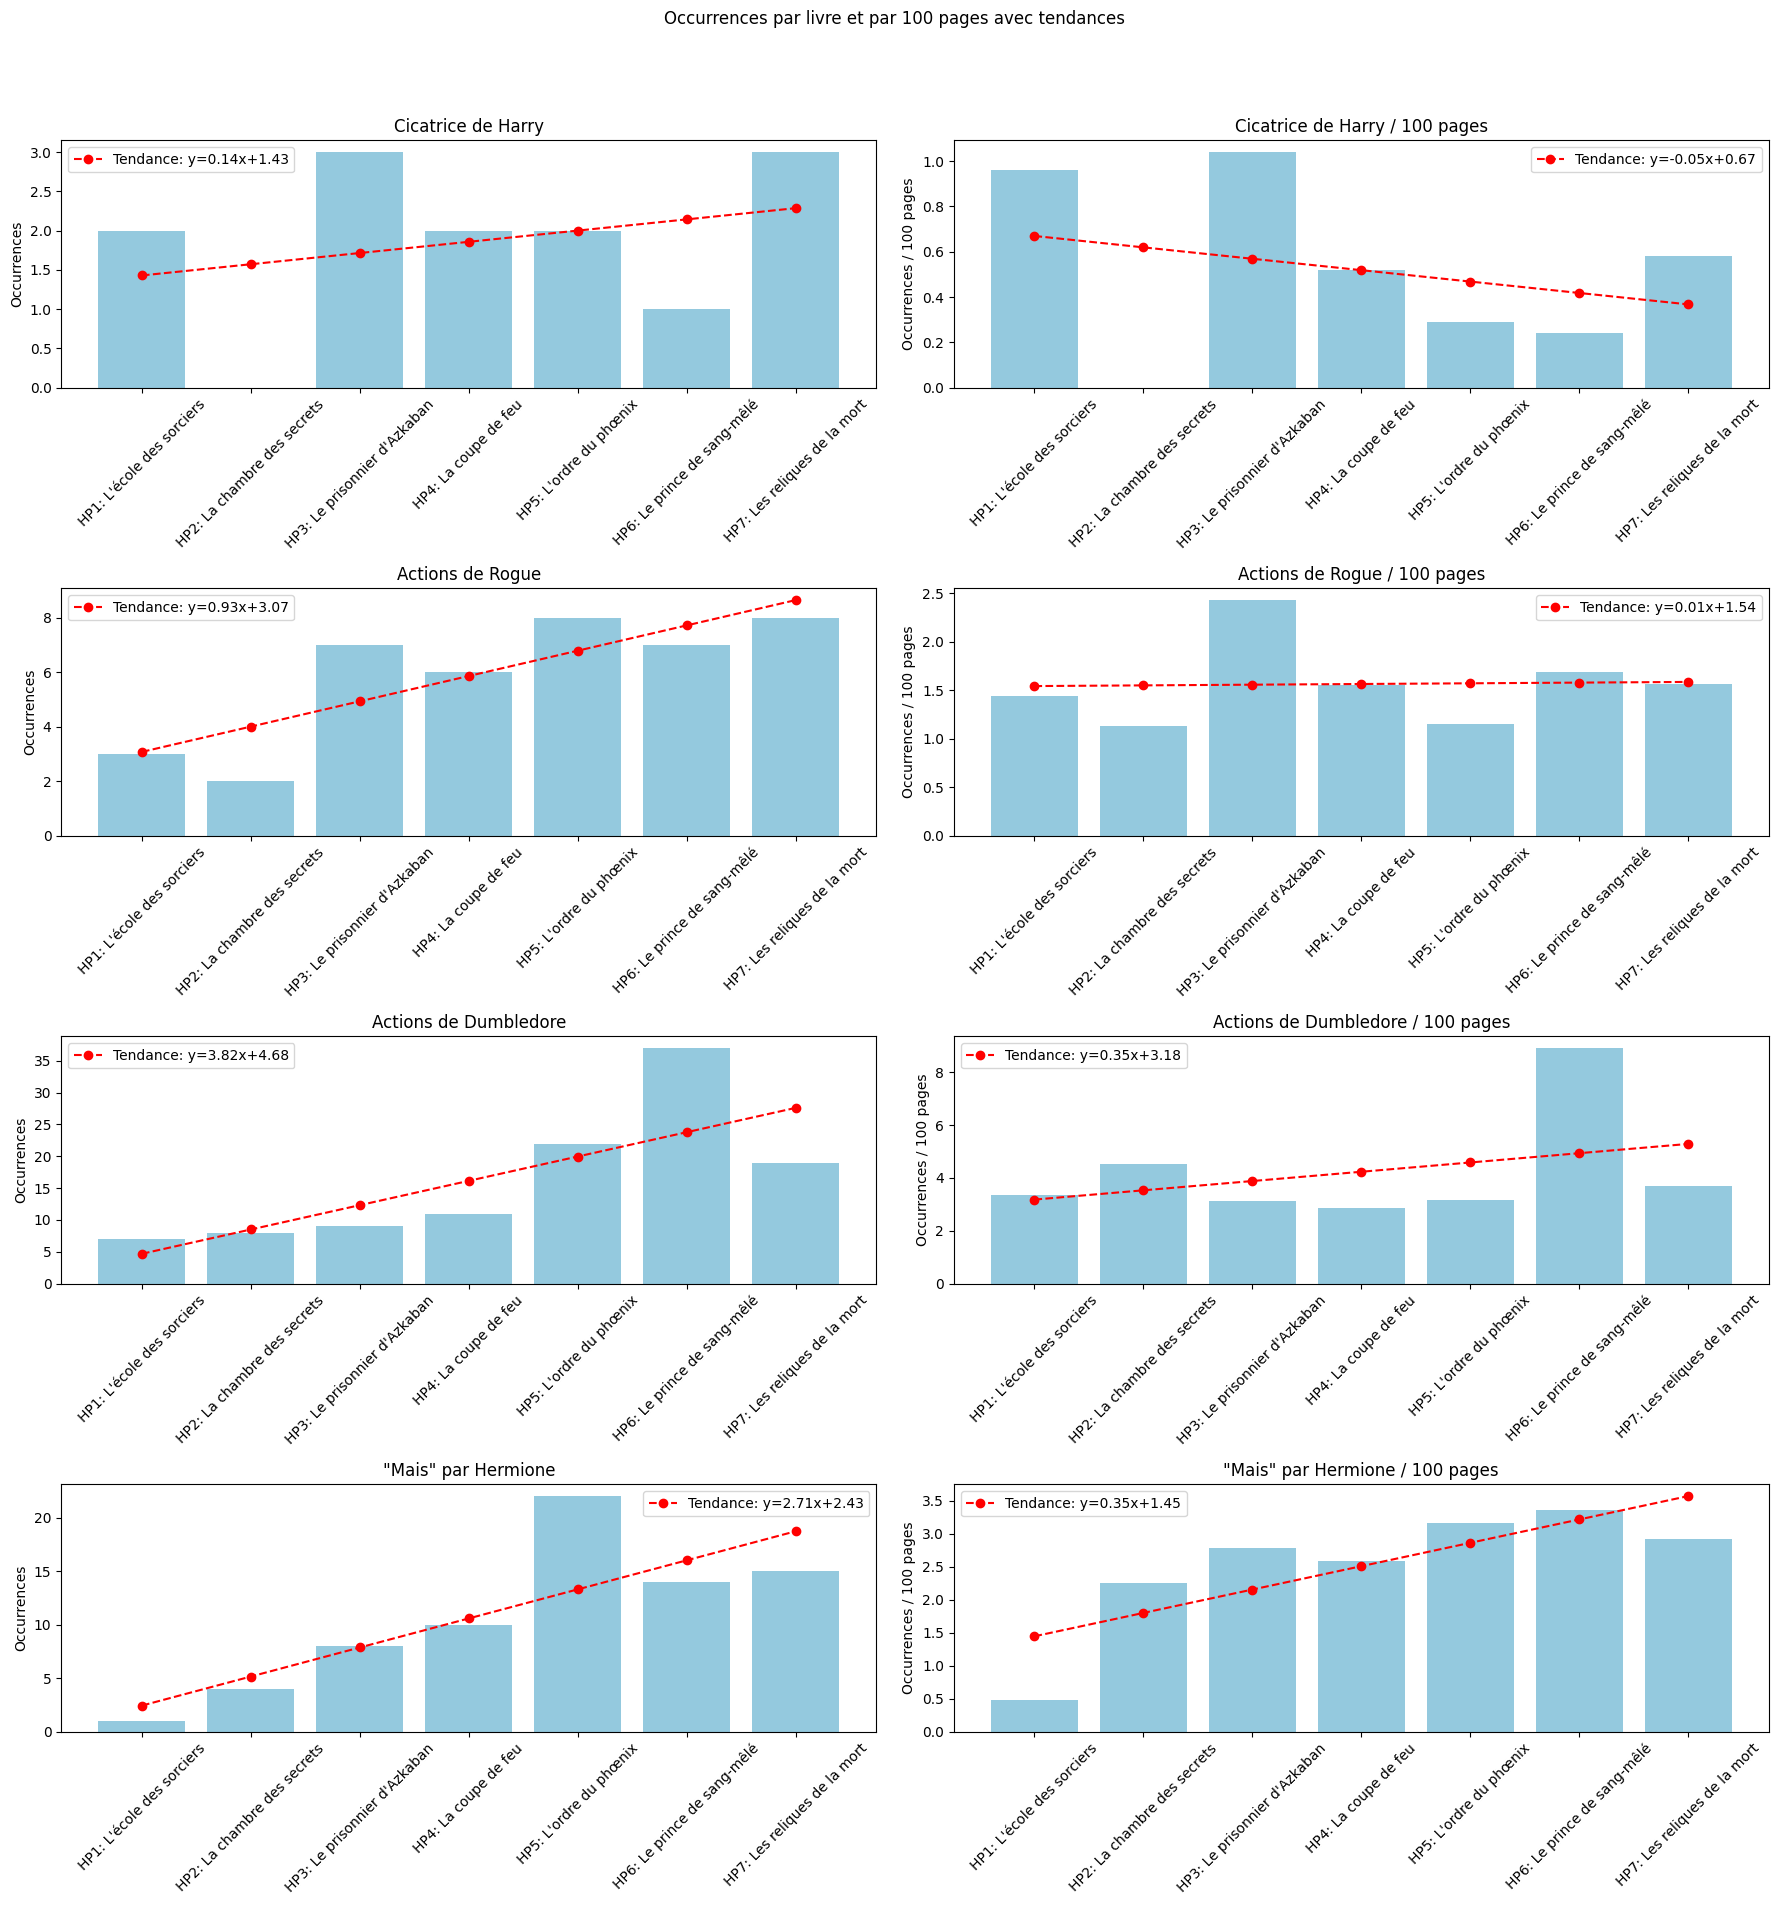

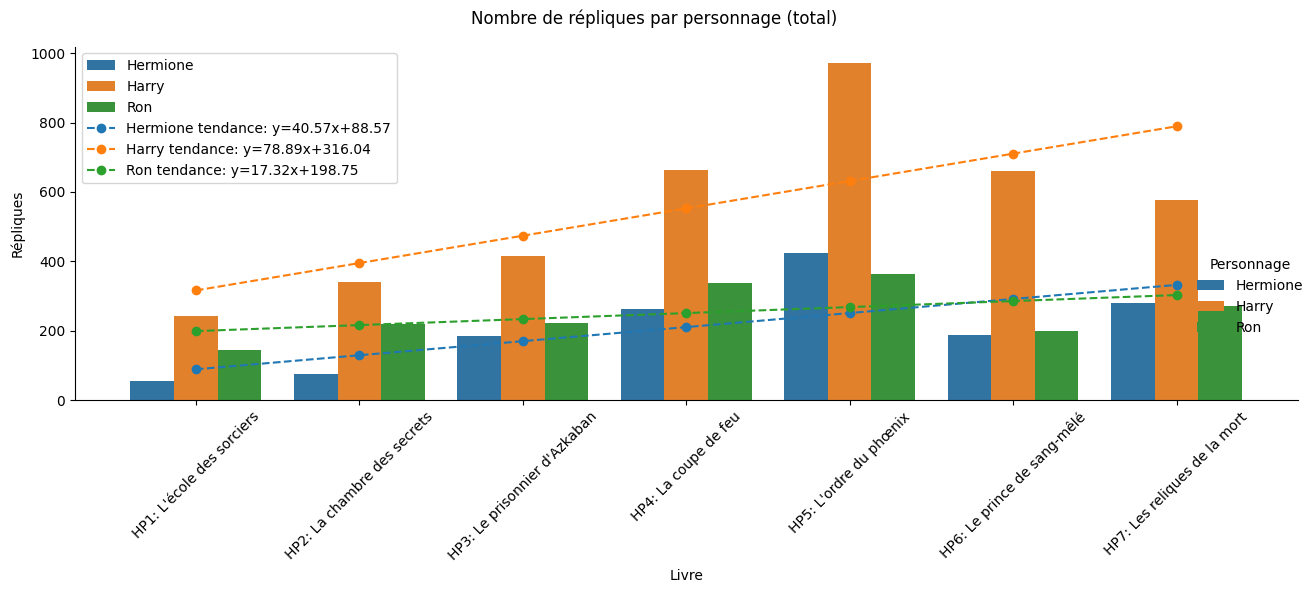

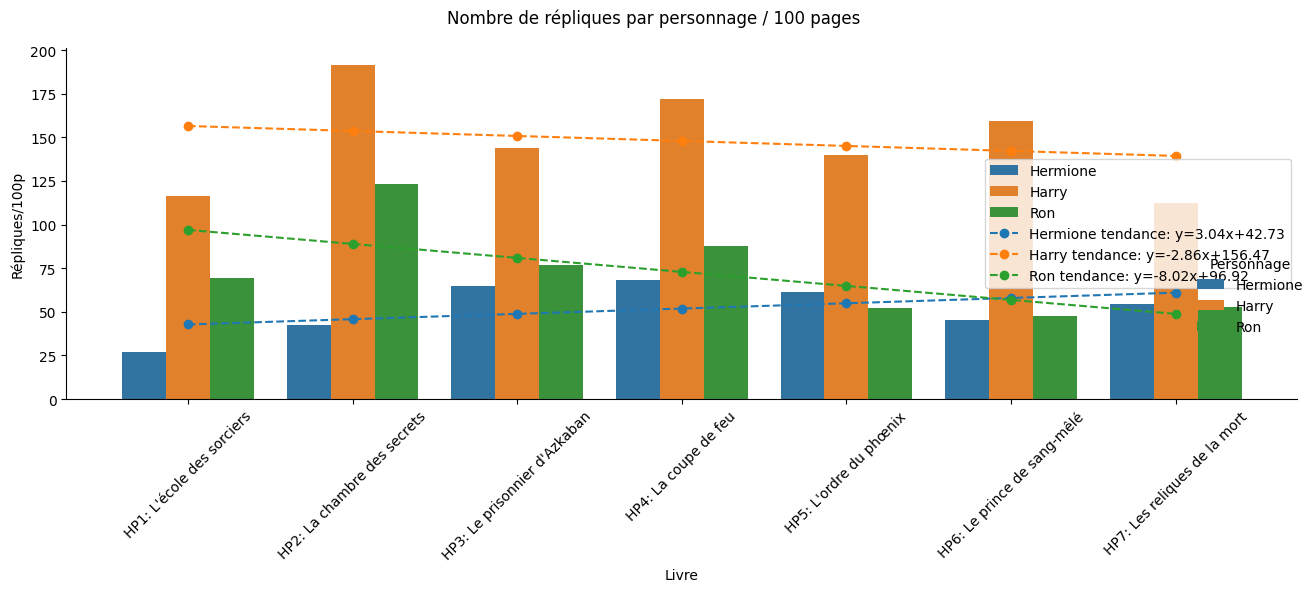

In [9]:
# Visualisation : barplots pour chaque tâche avec trend lines
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle("Occurrences par livre et par 100 pages avec tendances")

x = range(len(book_titles))

# Helper to plot bar and trend
def plot_with_trend(ax, y, title, ylabel):
    sns.barplot(x=book_titles, y=y, ax=ax, color='skyblue')
    # Fit linear trend (affine function)
    coeffs = np.polyfit(x, y, 1)
    trend = np.polyval(coeffs, x)
    ax.plot(x, trend, color='red', marker='o', linestyle='--', label=f'Tendance: y={coeffs[0]:.2f}x+{coeffs[1]:.2f}')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plot_with_trend(axes[0,0], cicatrice_counts, "Cicatrice de Harry", "Occurrences")
plot_with_trend(axes[0,1], cicatrice_100, "Cicatrice de Harry / 100 pages", "Occurrences / 100 pages")
plot_with_trend(axes[1,0], rogue_counts, "Actions de Rogue", "Occurrences")
plot_with_trend(axes[1,1], rogue_100, "Actions de Rogue / 100 pages", "Occurrences / 100 pages")
plot_with_trend(axes[2,0], dumbledore_counts, "Actions de Dumbledore", "Occurrences")
plot_with_trend(axes[2,1], dumbledore_100, "Actions de Dumbledore / 100 pages", "Occurrences / 100 pages")
plot_with_trend(axes[3,0], mais_counts, '"Mais" par Hermione', "Occurrences")
plot_with_trend(axes[3,1], mais_100, '"Mais" par Hermione / 100 pages', "Occurrences / 100 pages")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualisation : catplot pour le nombre de répliques (Hermione, Harry, Ron)
import numpy as np
import seaborn as sns
import pandas as pd

# Préparer le DataFrame pour catplot (total)
speech_total_df = pd.DataFrame({
    'Livre': np.tile(book_titles, 3),
    'Personnage': np.repeat(['Hermione', 'Harry', 'Ron'], len(book_titles)),
    'Répliques': np.concatenate([summary_df['Hermione parle'], summary_df['Harry parle'], summary_df['Ron parle']])
})

g1 = sns.catplot(data=speech_total_df, x='Livre', y='Répliques', hue='Personnage', kind='bar', height=6, aspect=2)
g1.fig.suptitle("Nombre de répliques par personnage (total)")
g1.set_xticklabels(rotation=45)

# Ajouter les tendances linéaires pour chaque personnage
for personnage in ['Hermione', 'Harry', 'Ron']:
    y = speech_total_df[speech_total_df['Personnage'] == personnage]['Répliques'].values
    coeffs = np.polyfit(x, y, 1)
    trend = np.polyval(coeffs, x)
    plt.plot(x, trend, marker='o', linestyle='--', label=f'{personnage} tendance: y={coeffs[0]:.2f}x+{coeffs[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Préparer le DataFrame pour catplot (per 100 pages)
speech_100_df = pd.DataFrame({
    'Livre': np.tile(book_titles, 3),
    'Personnage': np.repeat(['Hermione', 'Harry', 'Ron'], len(book_titles)),
    'Répliques/100p': np.concatenate([summary_df['Hermione/100p'], summary_df['Harry/100p'], summary_df['Ron/100p']])
})

g2 = sns.catplot(data=speech_100_df, x='Livre', y='Répliques/100p', hue='Personnage', kind='bar', height=6, aspect=2)
g2.fig.suptitle("Nombre de répliques par personnage / 100 pages")
g2.set_xticklabels(rotation=45)

# Ajouter les tendances linéaires pour chaque personnage
for personnage in ['Hermione', 'Harry', 'Ron']:
    y = speech_100_df[speech_100_df['Personnage'] == personnage]['Répliques/100p'].values
    coeffs = np.polyfit(x, y, 1)
    trend = np.polyval(coeffs, x)
    plt.plot(x, trend, marker='o', linestyle='--', label=f'{personnage} tendance: y={coeffs[0]:.2f}x+{coeffs[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()